In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [9]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [11]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

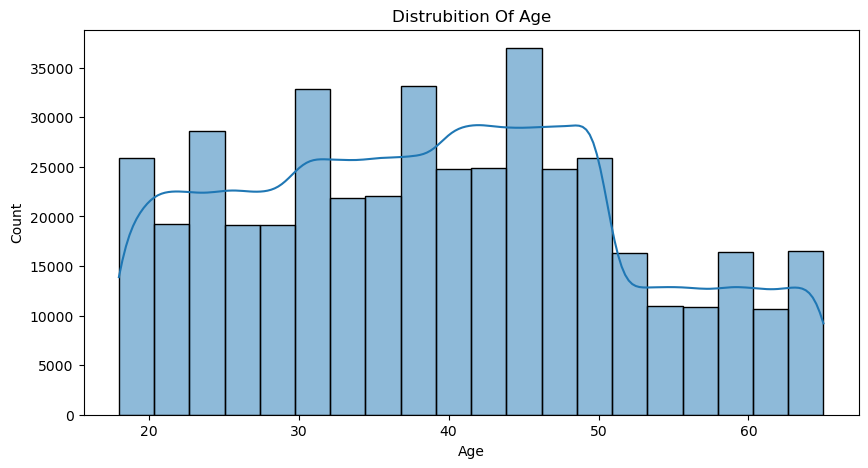

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20 ,kde=True)
plt.title('Distrubition Of Age')
plt.xlabel('Age')
plt.show

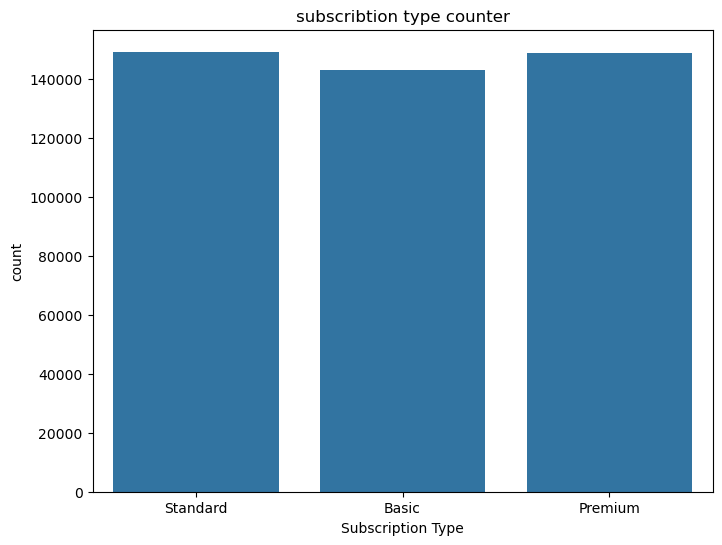

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='Subscription Type',data=df)
plt.title('subscribtion type counter')
plt.show()

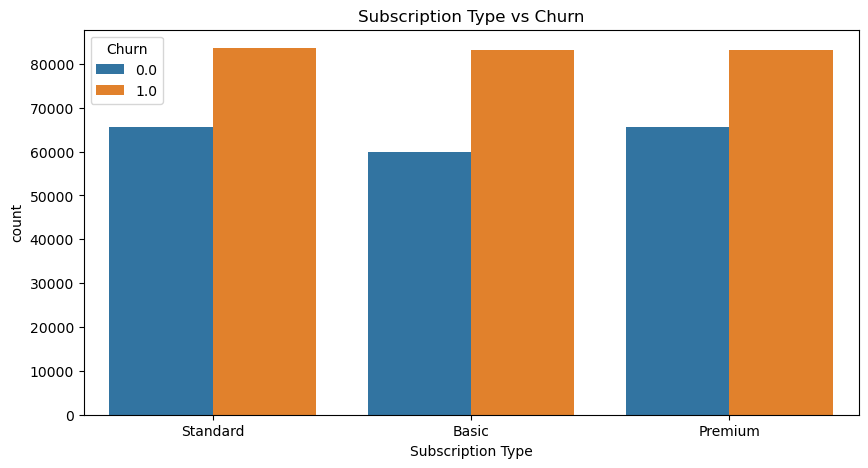

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title('Subscription Type vs Churn')
plt.show()

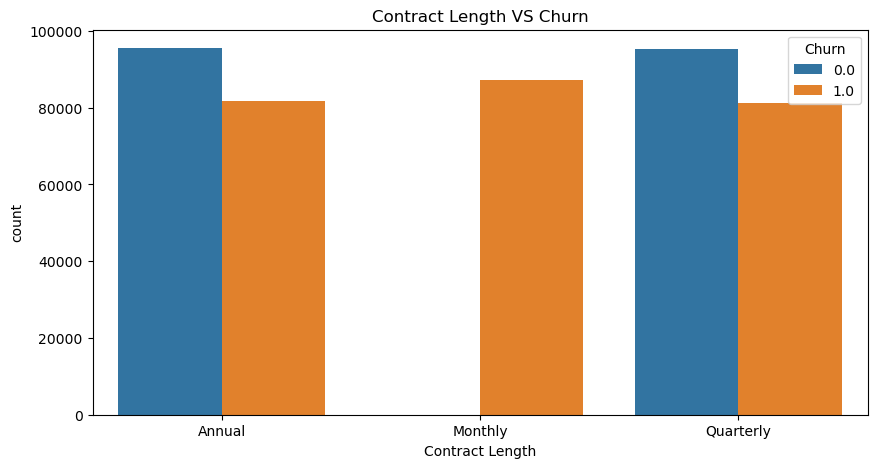

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Contract Length',hue='Churn' ,data=df)
plt.title('Contract Length VS Churn')
plt.show()

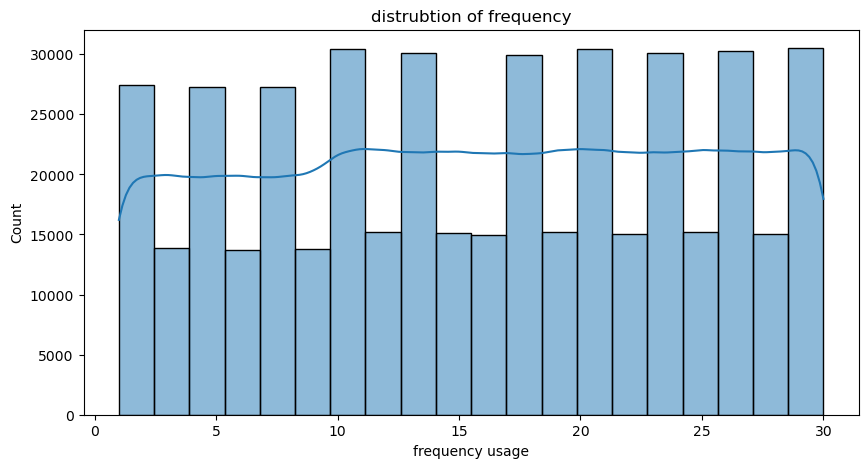

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['Usage Frequency'] ,bins=20 ,kde=True)
plt.xlabel('frequency usage')
plt.title('distrubtion of frequency')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [25]:
df["Contract Length"].value_counts()


Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [27]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [29]:
gender_map = {'Male': 0, 'Female': 1}
subscription_map = {'Standard': 0,'Premium': 1,'Basic': 2}
contract_length = {'Annual': 0,'Quarterly': 1,'Monthly': 2}

df['Gender']=df['Gender'].map(gender_map)
df['Subscription Type']=df['Subscription Type'].map(subscription_map)
df['Contract Length']=df['Contract Length'].map(contract_length)

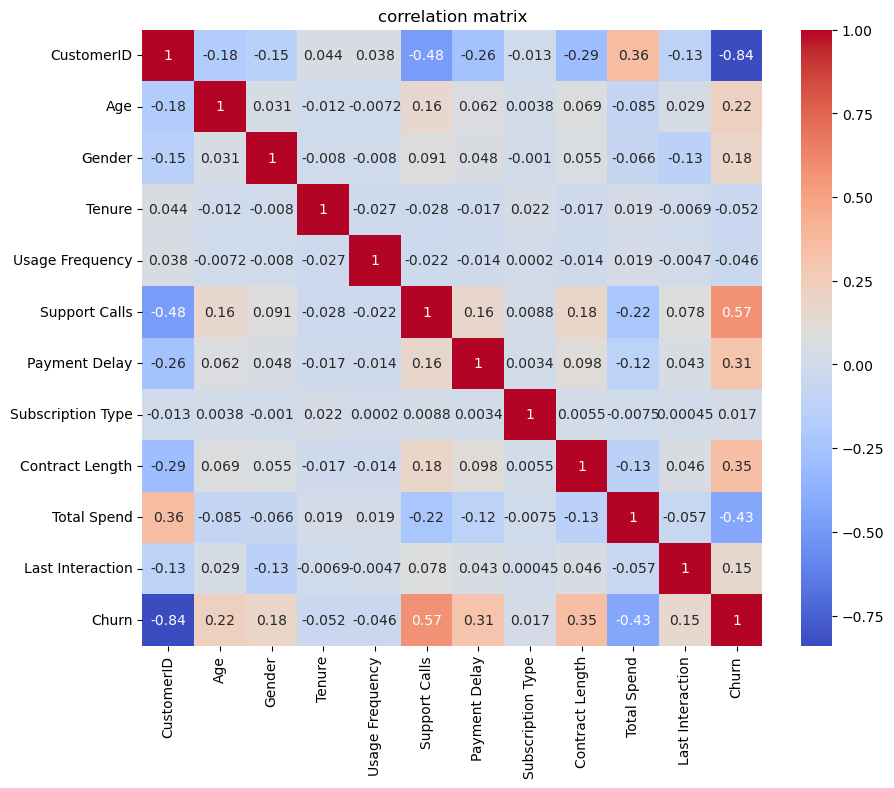

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [33]:
threshold = 0.03
correlation_matrix = df.corr()
high_correlation_features = correlation_matrix.index[abs(correlation_matrix['Churn'])>threshold].tolist()
high_correlation_features.remove('Churn')
print(high_correlation_features)

X_selected = df[high_correlation_features]
Y = df['Churn']

['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Contract Length', 'Total Spend', 'Last Interaction']


In [35]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X_selected , Y ,test_size=0.2 ,shuffle=True ,random_state=55)

In [37]:
X_train.isnull().sum()

CustomerID          1
Age                 1
Gender              1
Tenure              1
Usage Frequency     1
Support Calls       1
Payment Delay       1
Contract Length     1
Total Spend         1
Last Interaction    1
dtype: int64

In [39]:
X_train = X_train.dropna(axis=0)
X_test = X_test.dropna(axis=0)
Y_train = Y_train.dropna(axis=0)
Y_test = Y_test.dropna(axis=0)

In [41]:
X_train.isnull().sum()

CustomerID          0
Age                 0
Gender              0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Contract Length     0
Total Spend         0
Last Interaction    0
dtype: int64

In [43]:
model = LogisticRegression(max_iter=1000 ,random_state=42)
model.fit(X_train ,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
Y_pred = model.predict(X_test)


In [45]:
print(accuracy_score(Y_test ,Y_pred))

0.9693422709176903


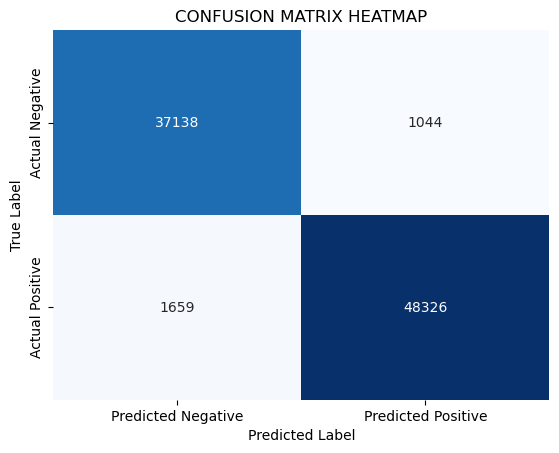

In [52]:
conf_matrix = confusion_matrix(Y_test ,Y_pred)

sns.heatmap(conf_matrix ,annot=True ,fmt='d' ,cmap='Blues' ,cbar=False ,xticklabels =['Predicted Negative','Predicted Positive'] ,yticklabels =['Actual Negative','Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()



In [46]:
model2 = SVC()
model2.fit(X_train , Y_train)

SVC()

In [50]:
Y_pred2 = model2.predict(X_test)
print(accuracy_score(Y_test , Y_pred2))

0.9917429423707282


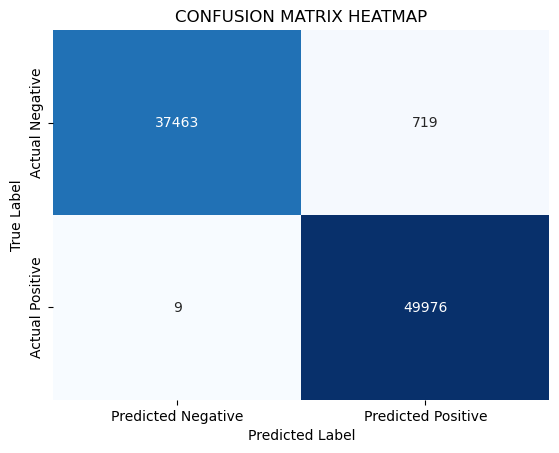

In [51]:
conf_matrix2 = confusion_matrix(Y_test ,Y_pred2)

sns.heatmap(conf_matrix2 ,annot=True ,fmt='d' ,cmap='Blues' ,cbar=False ,xticklabels =['Predicted Negative','Predicted Positive'] ,yticklabels =['Actual Negative','Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()



In [53]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [54]:
knn.fit(X_train ,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
Y_pred_knn = knn.predict(X_test)

In [56]:
accuracy_score(Y_test ,Y_pred_knn)
print(accuracy_score(Y_test ,Y_pred_knn))

0.9898828359817166


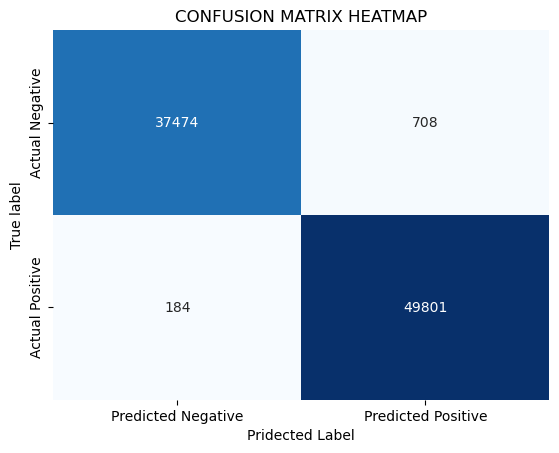

In [57]:
conf_matrix3 = confusion_matrix(Y_test ,Y_pred_knn)

sns.heatmap(conf_matrix3 , annot = True ,fmt='d' ,cmap = 'Blues',cbar = False ,xticklabels =['Predicted Negative','Predicted Positive'] ,yticklabels = ['Actual Negative','Actual Positive'])
plt.xlabel('Pridected Label')
plt.ylabel('True label')
plt.title('CONFUSION MATRIX HEATMAP')
plt.show()

In [61]:
import pickle

# Save Logistic Regression model
with open('model_logistic_regression.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save SVM model
with open('model_svm.pkl', 'wb') as file:
    pickle.dump(model2, file)

# Save KNN model
with open('model_knn.pkl', 'wb') as file:
    pickle.dump(knn, file)

print("Models saved successfully as .pkl files.")

Models saved successfully as .pkl files.


In [62]:
# Load and verify the Logistic Regression model
with open('model_logistic_regression.pkl', 'rb') as file:
    loaded_logreg = pickle.load(file)
print("Loaded Logistic Regression model:", loaded_logreg)



Loaded Logistic Regression model: LogisticRegression(max_iter=1000, random_state=42)


In [63]:
# Load and verify the SVM model
with open('model_svm.pkl', 'rb') as file:
    loaded_svm = pickle.load(file)
print("Loaded SVM model:", loaded_svm)


Loaded SVM model: SVC()


In [70]:
# Load and verify the KNN model
with open('model_knn.pkl', 'rb') as file:
    loaded_knn = pickle.load(file)
print("Loaded KNN model:", loaded_knn)

Loaded KNN model: KNeighborsClassifier(n_neighbors=3)


In [93]:
import pandas as pd

# Load test dataset
test_df = pd.read_csv('customer_churn_dataset-testing-master.csv')

# Drop kolom yang tidak dipakai
if 'customerID' in test_df.columns:
    test_df = test_df.drop(columns=['customerID'])

if 'Churn' in test_df.columns:
    test_df = test_df.drop(columns=['Churn'])

# Mapping manual sesuai training
gender_map = {'Male': 0, 'Female': 1}
subscription_map = {'Standard': 0, 'Premium': 1, 'Basic': 2}
contract_length = {'Annual': 0, 'Quarterly': 1, 'Monthly': 2}

test_df['Gender'] = test_df['Gender'].map(gender_map)
test_df['Subscription Type'] = test_df['Subscription Type'].map(subscription_map)
test_df['Contract Length'] = test_df['Contract Length'].map(contract_length)

X_test = test_df  # data siap untuk prediksi


In [97]:
# Load and test Logistic Regression model
import joblib

logreg_model = joblib.load('model_logistic_regression.pkl')
logreg_preds = logreg_model.predict(X_test)

print("Logistic Regression Predictions:")
print(logreg_preds)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Subscription Type


In [99]:

# Load and test SVM model
svm_model = joblib.load('model_svm.pkl')
svm_preds = svm_model.predict(X_test)

print("SVM Predictions:")
print(svm_preds)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Subscription Type


In [101]:

# Load and test KNN model
knn_model = joblib.load('model_knn.pkl')
knn_preds = knn_model.predict(X_test)

print("KNN Predictions:")
print(knn_preds)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Subscription Type


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib
import time

# Load dataset
df = pd.read_csv('customer_churn_dataset-training-master.csv')

# Handle missing values
df = df.dropna()  # atau df.fillna(method='ffill') jika Anda ingin forward-fill


In [123]:
# Encode categorical columns
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Subscription Type'] = df['Subscription Type'].map({'Standard': 0, 'Premium': 1, 'Basic': 2})
df['Contract Length'] = df['Contract Length'].map({'Annual': 0, 'Quarterly': 1, 'Monthly': 2})


In [125]:
# Features and label
features = ['Age', 'Payment Delay', 'Gender', 'Subscription Type', 'Tenure',
            'Contract Length', 'Usage Frequency', 'Total Spend',
            'Support Calls', 'Last Interaction']
X = df[features]
y = df['Churn']



In [127]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Training Logistic Regression Model

start = time.time()
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
end = time.time()
joblib.dump(logreg, 'new_model_logistic_regression.pkl')
print(f"✅ Logistic Regression trained in {end - start:.2f} seconds")



✅ Logistic Regression trained in 17.68 seconds


In [131]:
# Training SVM Model

start = time.time()
svm = SVC()
svm.fit(X_train, y_train)
end = time.time()
joblib.dump(svm, 'new_model_svm.pkl')
print(f"✅ SVM trained in {end - start:.2f} seconds")



✅ SVM trained in 3959.46 seconds


In [133]:
# Training KNN Model

start = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
end = time.time()
joblib.dump(knn, 'new_model_knn.pkl')
print(f"✅ KNN trained in {end - start:.2f} seconds")


✅ KNN trained in 1.01 seconds


In [136]:
TESTING

NameError: name 'TESTING' is not defined

In [138]:
import pandas as pd
import joblib

# Load test data
test_df = pd.read_csv('customer_churn_dataset-testing-master.csv')

# Encode categorical columns
test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['Subscription Type'] = test_df['Subscription Type'].map({'Standard': 0, 'Premium': 1, 'Basic': 2})
test_df['Contract Length'] = test_df['Contract Length'].map({'Annual': 0, 'Quarterly': 1, 'Monthly': 2})

# Select same features used in training
features = ['Age', 'Payment Delay', 'Gender', 'Subscription Type', 'Tenure',
            'Contract Length', 'Usage Frequency', 'Total Spend',
            'Support Calls', 'Last Interaction']
X_test = test_df[features]


In [140]:
# Testing Logistic Regression Model

# Load model
logreg_model = joblib.load('new_model_logistic_regression.pkl')

# Predict
logreg_preds = logreg_model.predict(X_test)
print("🔵 Logistic Regression Predictions:")
print(logreg_preds)


🔵 Logistic Regression Predictions:
[1. 1. 1. ... 1. 1. 1.]


In [142]:
# Testing SVM Model

svm_model = joblib.load('new_model_svm.pkl')
svm_preds = svm_model.predict(X_test)
print("🟢 SVM Predictions:")
print(svm_preds)


🟢 SVM Predictions:
[1. 1. 1. ... 1. 1. 1.]


In [143]:
# Testing KNN Model

knn_model = joblib.load('new_model_knn.pkl')
knn_preds = knn_model.predict(X_test)
print("🟣 KNN Predictions:")
print(knn_preds)


🟣 KNN Predictions:
[1. 1. 1. ... 1. 1. 1.]


In [150]:
import os

# Create the model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Fit and save LabelEncoders for categorical variables
le_gender = LabelEncoder()
le_gender.fit(df['Gender'].dropna().unique())  # Train on unique values from the dataset
joblib.dump(le_gender, 'model/le_gender.pkl')

le_sub_type = LabelEncoder()
le_sub_type.fit(df['Subscription Type'].dropna().unique())
joblib.dump(le_sub_type, 'model/le_sub_type.pkl')

le_contract = LabelEncoder()
le_contract.fit(df['Contract Length'].dropna().unique())
joblib.dump(le_contract, 'model/le_contract.pkl')

# Fit and save StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Use the X_train from cell 127
joblib.dump(scaler, 'model/scaler.pkl')

print("Preprocessing objects saved successfully to 'model/' directory.")

Preprocessing objects saved successfully to 'model/' directory.


In [152]:
import joblib
le_gender = joblib.load('model/le_gender.pkl')
print(le_gender.classes_)  # Should print ['Female' 'Male']
scaler = joblib.load('model/scaler.pkl')
print(scaler.mean_)  # Should print the mean of each feature from X_train

[0 1]
[3.93628174e+01 1.29689195e+01 4.32115464e-01 9.87004664e-01
 3.12650703e+01 7.95976351e-01 1.58109849e+01 6.31584906e+02
 3.60317582e+00 1.44739484e+01]


In [156]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load objects
model = joblib.load("new_model_logistic_regression.pkl")
scaler = joblib.load("model/scaler.pkl")

# Example data (match one row from X_train)
test_data = {
    'Age': 30.0, 'Payment Delay': 18.0, 'Gender': 1, 'Subscription Type': 0,
    'Tenure': 39.0, 'Contract Length': 0, 'Usage Frequency': 14.0,
    'Total Spend': 932.00, 'Support Calls': 5.0, 'Last Interaction': 17.0
}
X_test = pd.DataFrame([test_data])
X_scaled = scaler.transform(X_test)
prediction = model.predict(X_scaled)
print(f"Prediction: {prediction}")

Prediction: [0.]


In [158]:
import os
import joblib
from sklearn.preprocessing import LabelEncoder

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Fit and save LabelEncoders for categorical variables
le_gender = LabelEncoder()
le_gender.fit(df['Gender'].dropna().unique())  # Fit on ['Female', 'Male']
joblib.dump(le_gender, 'model/le_gender.pkl')

le_sub_type = LabelEncoder()
le_sub_type.fit(df['Subscription Type'].dropna().unique())  # Fit on ['Standard', 'Basic', 'Premium']
joblib.dump(le_sub_type, 'model/le_sub_type.pkl')

le_contract = LabelEncoder()
le_contract.fit(df['Contract Length'].dropna().unique())  # Fit on ['Annual', 'Monthly', 'Quarterly']
joblib.dump(le_contract, 'model/le_contract.pkl')

# Verify the classes
print("Gender classes:", le_gender.classes_)
print("Subscription Type classes:", le_sub_type.classes_)
print("Contract Length classes:", le_contract.classes_)

# Fit and save StandardScaler (ensure X_train is defined)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Use the X_train from train_test_split
joblib.dump(scaler, 'model/scaler.pkl')

print("Preprocessing objects saved successfully.")

Gender classes: [0 1]
Subscription Type classes: [0 1 2]
Contract Length classes: [0 1 2]
Preprocessing objects saved successfully.


In [160]:
import os
import joblib
from sklearn.preprocessing import LabelEncoder

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Load the dataset
df = pd.read_csv("customer_churn_dataset-training-master.csv")

# Fit and save LabelEncoders for categorical variables
le_gender = LabelEncoder()
le_gender.fit(df['Gender'].dropna().unique())  # Should fit ['Female', 'Male']
joblib.dump(le_gender, 'model/new_le_gender.pkl')

le_sub_type = LabelEncoder()
le_sub_type.fit(df['Subscription Type'].dropna().unique())  # Should fit ['Standard', 'Basic', 'Premium']
joblib.dump(le_sub_type, 'model/new_le_sub_type.pkl')

le_contract = LabelEncoder()
le_contract.fit(df['Contract Length'].dropna().unique())  # Should fit ['Annual', 'Monthly', 'Quarterly']
joblib.dump(le_contract, 'model/new_le_contract.pkl')

# Verify the classes
print("Gender classes:", le_gender.classes_)
print("Subscription Type classes:", le_sub_type.classes_)
print("Contract Length classes:", le_contract.classes_)

# Fit and save StandardScaler (ensure X_train is defined)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Use the X_train from train_test_split
joblib.dump(scaler, 'model/new_scaler.pkl')

print("Preprocessing objects saved successfully.")

Gender classes: ['Female' 'Male']
Subscription Type classes: ['Basic' 'Premium' 'Standard']
Contract Length classes: ['Annual' 'Monthly' 'Quarterly']
Preprocessing objects saved successfully.


In [162]:
import joblib
le_gender = joblib.load('model/new_le_gender.pkl')
print("Loaded Gender classes:", le_gender.classes_)

Loaded Gender classes: ['Female' 'Male']


In [164]:
import os
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("customer_churn_dataset-training-master.csv")

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Fit and save LabelEncoders for categorical variables
le_gender = LabelEncoder()
le_gender.fit(df['Gender'].dropna().unique())  # Should fit ['Female', 'Male']
joblib.dump(le_gender, 'model/le_gender_new.pkl')

le_sub_type = LabelEncoder()
le_sub_type.fit(df['Subscription Type'].dropna().unique())  # Should fit ['Standard', 'Basic', 'Premium']
joblib.dump(le_sub_type, 'model/le_sub_type_new.pkl')

le_contract = LabelEncoder()
le_contract.fit(df['Contract Length'].dropna().unique())  # Should fit ['Annual', 'Monthly', 'Quarterly']
joblib.dump(le_contract, 'model/le_contract_new.pkl')

# Verify the classes
print("Gender classes:", le_gender.classes_.tolist())
print("Subscription Type classes:", le_sub_type.classes_.tolist())
print("Contract Length classes:", le_contract.classes_.tolist())

# Fit and save StandardScaler (ensure X_train is defined)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Use the X_train from train_test_split
joblib.dump(scaler, 'model/scaler_new.pkl')

print("Preprocessing objects saved successfully.")

Gender classes: ['Female', 'Male']
Subscription Type classes: ['Basic', 'Premium', 'Standard']
Contract Length classes: ['Annual', 'Monthly', 'Quarterly']
Preprocessing objects saved successfully.


In [168]:
import joblib
le_gender = joblib.load('model/le_gender_new.pkl')
print("Loaded Gender classes:", le_gender.classes_)

Loaded Gender classes: ['Female' 'Male']


In [170]:
import joblib
le_sub_type= joblib.load('model/le_sub_type_new.pkl')
print("Loaded Subscription Type classes:", le_sub_type.classes_)

Loaded Subscription Type classes: ['Basic' 'Premium' 'Standard']


In [172]:
import joblib
le_contract = joblib.load('model/le_contract_new.pkl')
print("Loaded Contract classes:", le_contract.classes_)

Loaded Contract classes: ['Annual' 'Monthly' 'Quarterly']
